## Activity 03
### Tyler Barna

In [1]:
## import modules (running on python 3.9.12)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma
import random
random.seed(5731) ## set seed for reproducibility

## import data
df = pd.read_csv('MountStrombloAbellClusterSN_Survey.dat', sep='\s+')
numClusters = 74 ## total number of clusters in survey

## add a column for just the year by converting SN column
df['year'] = df['SN'].str.extract('(\d{4})', expand=True).astype(int)
df.head()

,SN,Abell,Type,year
0,1996af,3879,nIa,1996
1,1996ag,3809,Ia?,1996
2,1996aj,3559,Ia,1996
3,1996am,3809,Ia,1996
4,1996ao,3128,Ia,1996


In [2]:
## print some stats on the data
print('General Stats')
print('Number of Supernovae: %s \n'%len(df))
print('Number of Clusters with Supernovae: %s \n' %len(df['Abell']))
print('Number of Unique Clusters with Supernovae: %s \n'%len(df['Abell'].unique()))
print('Total number of clusters: %s \n'%numClusters)
print('Number of clusters with no supernovae: %s \n'%(numClusters-len(df['Abell'].unique())))
print('Year range of Supernovae: %s - %s \n ' %(df['year'].min(), df['year'].max()))
print('Actual time frame of survey: 3.5 years')

General Stats
Number of Supernovae: 48 

Number of Clusters with Supernovae: 48 

Number of Unique Clusters with Supernovae: 31 

Total number of clusters: 74 

Number of clusters with no supernovae: 43 

Year range of Supernovae: 1996 - 1999 
 
Actual time frame of survey: 3.5 years


In [3]:
## Import Ia and Ia? data
df_Ia = df[(df['Type'] == 'Ia') | (df['Type'] == 'Ia?')]

print('Ia Stats')

print('Number of Ia and Ia? SNe: %s \n'%len(df_Ia))
print('Number of clusters with Ia and Ia? SNe: %s \n'%len(df_Ia['Abell']))
print('Number of unique clusters with Ia and Ia? SNe: %s \n'%len(df_Ia['Abell'].unique()))
print('Year range of Ia and Ia? SNe: %s - %s'%(df_Ia['year'].min(), df_Ia['year'].max()))

Ia Stats
Number of Ia and Ia? SNe: 23 

Number of clusters with Ia and Ia? SNe: 23 

Number of unique clusters with Ia and Ia? SNe: 18 

Year range of Ia and Ia? SNe: 1996 - 1999


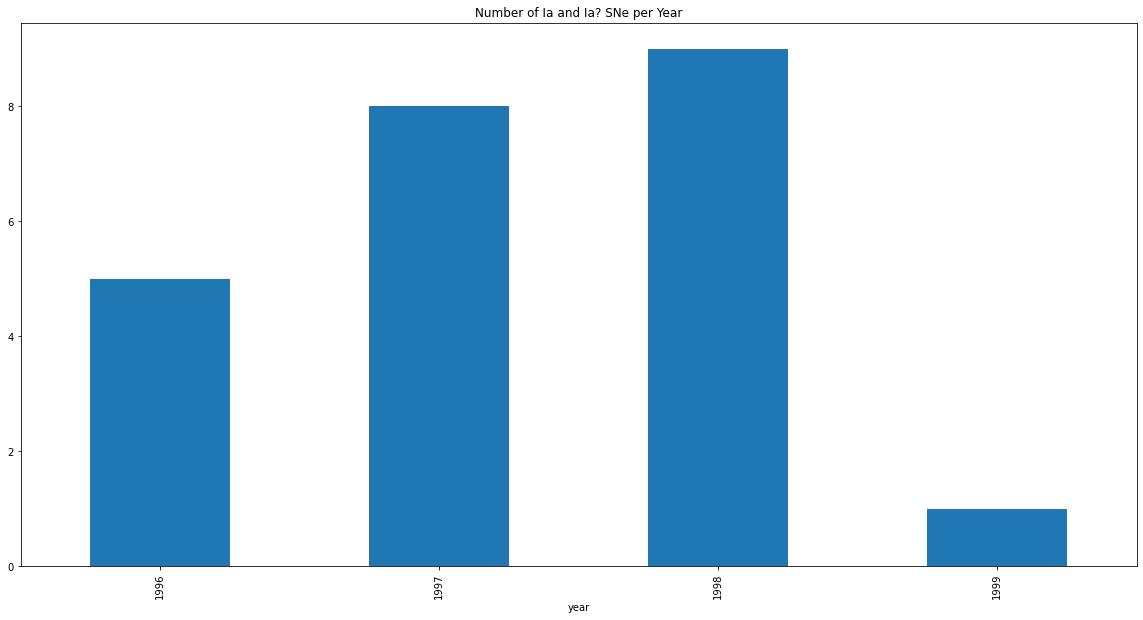

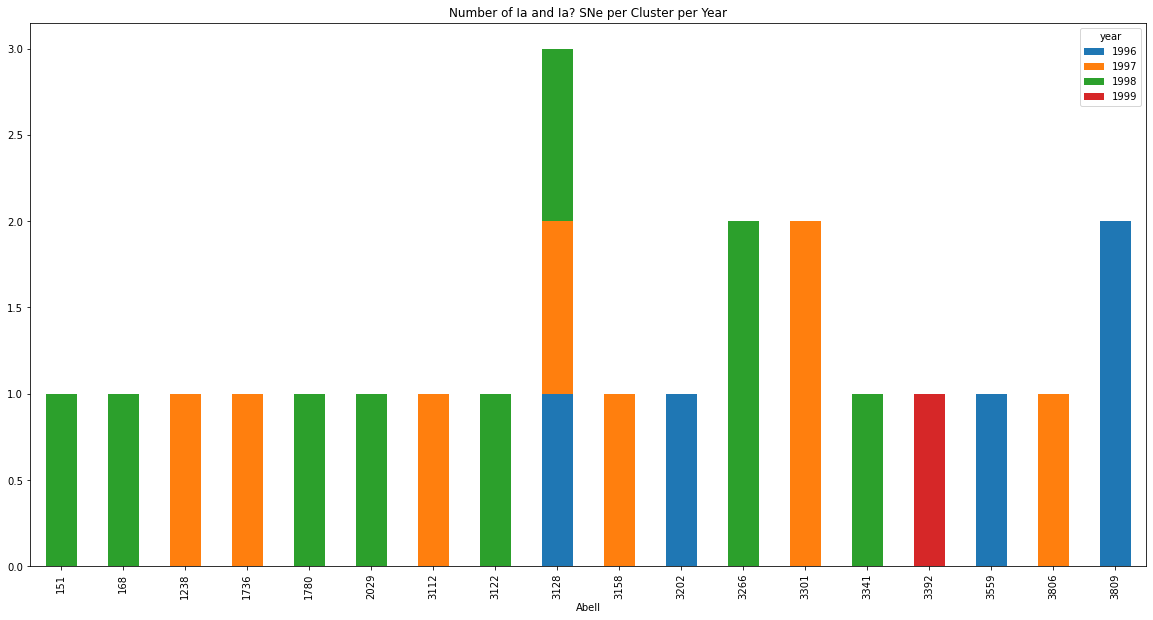

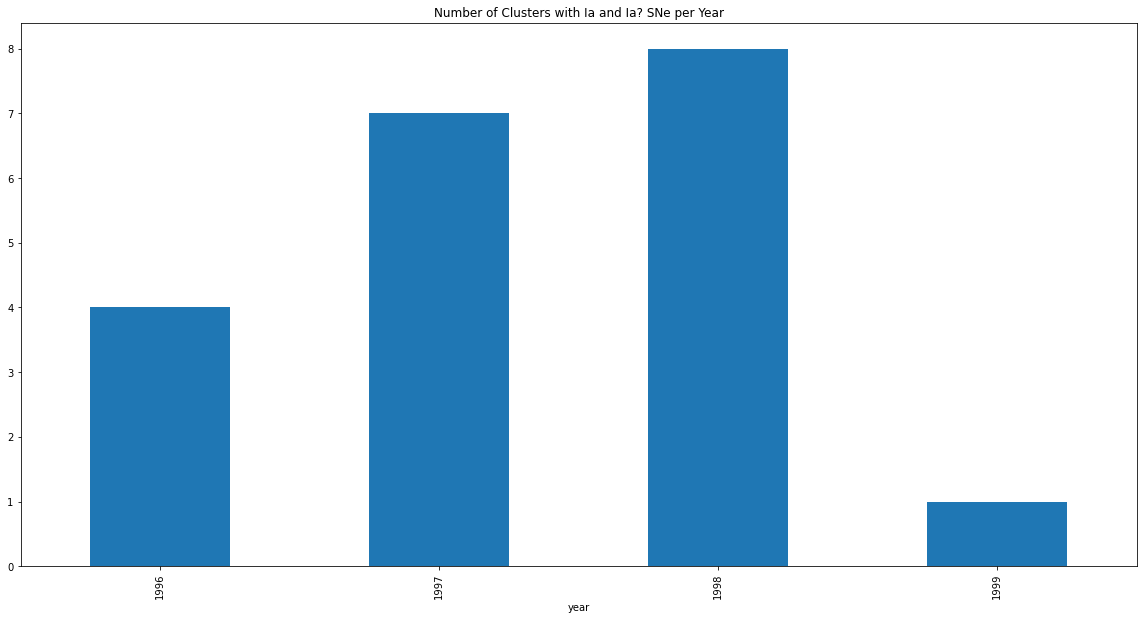

In [4]:
## plot number of supernova per year
df_Ia.groupby(['year']).size().plot(kind='bar', figsize=(20,10));
plt.title('Number of Ia and Ia? SNe per Year')
plt.show();

## group SN by Abell Cluster and year and plot histogram
df_Ia.groupby(['Abell', 'year']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10));
plt.title('Number of Ia and Ia? SNe per Cluster per Year')
plt.show();

## plot number of clusters with Ia and Ia? SNe per year
df_Ia.groupby(['year'])['Abell'].nunique().plot(kind='bar', figsize=(20,10));
plt.title('Number of Clusters with Ia and Ia? SNe per Year')
plt.show();

## Now, let's do some statistics!

Note that the gammma paramtetrization is the same as the one we discussed in class

theta = 6.571428571428571
Max of prior: 18.01801801801802
Mean of prior: 5.0


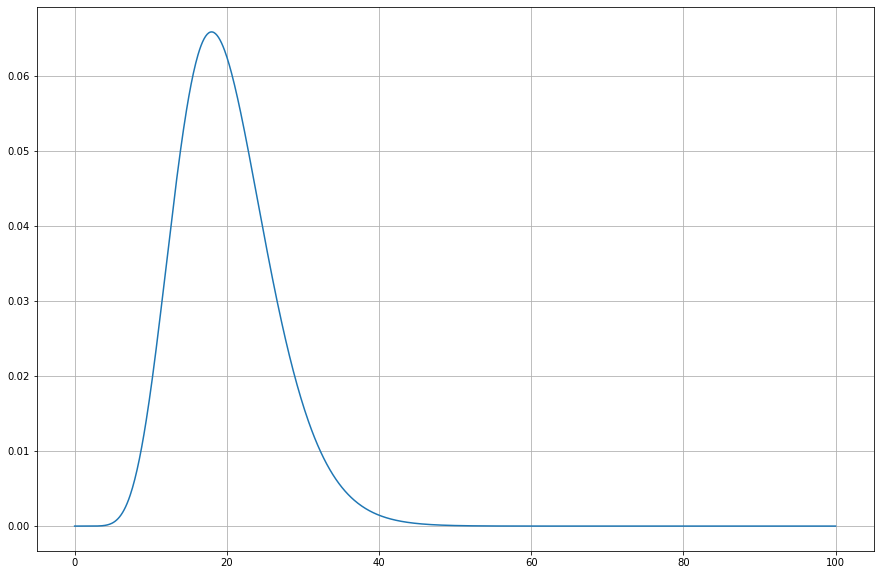

In [25]:
## get theta, the mean rate of SNe per year
x_1 = len(df_Ia)
t_1 = 3.5

theta = x_1/t_1
print('theta = %s' %theta)

## generate gamma distribution for prior
fig, ax = plt.subplots(1, 1, figsize=(15,10))
a = 10
b = 1/2
x = np.linspace(0, 100, 1000)
y = gamma.pdf(x, a, scale=1/b)
plt.plot(x, y)
plt.grid();


## mean and max of prior
print('Max of prior: %s' %x[y.argmax()])
print('Mean of prior: %s' %gamma.mean(a, scale=b))

plt.show();

Max of prior: 8.008008008008009
Mean of prior: 8.25


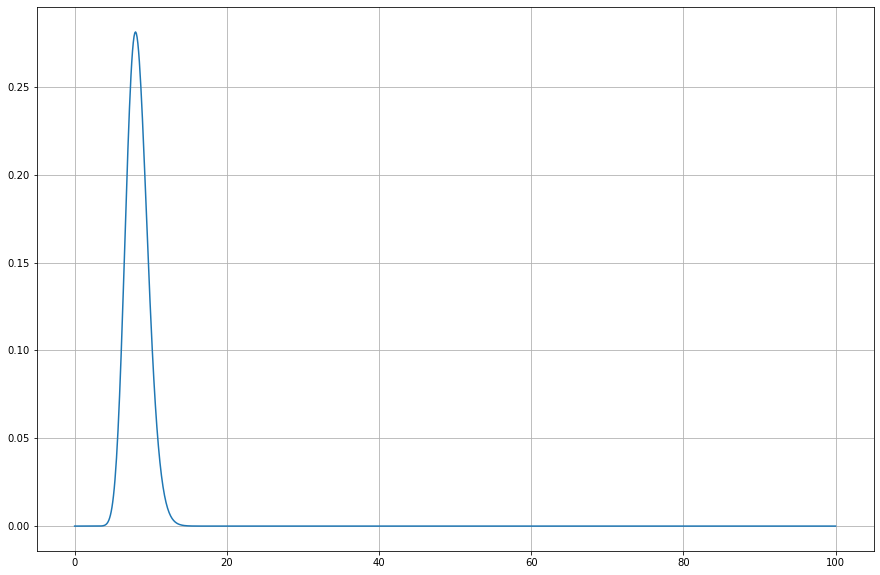

In [26]:
## generate gamma distribution for posterior
a_post = a + x_1
b_post = b + t_1
x = np.linspace(0, 100, 1000)
y = gamma.pdf(x, a_post, scale=1/b_post)
fig, ax = plt.subplots(1, 1, figsize=(15,10))
plt.plot(x, y)
plt.grid()

## mean and max of posterior
print('Max of prior: %s' %x[y.argmax()])
print('Mean of prior: %s' %gamma.mean(a_post, scale=1/b_post))

plt.show();